# CS436 Project: 3D Scene Reconstruction
## Week 1 Milestone: Setup & Feature Matching

**Group Members:**
* Choudhary Usman Alam, 26100383
* Muneeb ur Rehman, 26100346

**Objective:** The goal of this milestone is to set up the project environment, collect a suitable dataset for Structure from Motion (SfM), and implement feature matching with proper preprocessing (filtering).

1. ORB (Oriented FAST and Rotated BRIEF)

ORB is a computationally efficient alternative to SIFT, combining the FAST keypoint detector with the BRIEF descriptor. It is rotation invariant and partially scale invariant, offering a much faster runtime while maintaining good matching accuracy. ORB uses binary descriptors, enabling quick matching through Hamming distance rather than floating-point computations, which makes it ideal for real-time or resource-constrained environments.

2. SIFT (Scale-Invariant Feature Transform)

SIFT is a robust and highly accurate feature detection and description algorithm. It identifies distinctive keypoints in an image that are invariant to scale, rotation, and illumination changes, making it particularly effective for scenes with rich textures and varying lighting condition, which is exactly the scenerio in our images. It capture detailed gradient information around each keypoint, allowing for precise and stable matching across consecutive frames. SIFT provides high-quality correspondences that will improve the accuracy of later steps such as Essential Matrix estimation and triangulation.


We experimented with both to pick the best matcher later and also compare the computation limits of both the methods that might be useful in later development.

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
project_root = os.path.abspath(os.path.join('..'))
if os.path.join(project_root, 'src') not in sys.path:
    sys.path.append(os.path.join(project_root, 'src'))

from utils import load_images_from_folder, get_sift_matches, draw_matches

print("Environment set up. OpenCV version:", cv2.__version__)

Environment set up. OpenCV version: 4.12.0


## 1. Data Collection
We collected a dataset of **28 images** of a cluttered hostel room. 
* **Scene:** Static scene with rich textures (books, furniture).
* **Method:** Images were captured with **60-80% overlap** by moving the camera in a continuous arc (parallax), rather than just rotating it.
* **Lighting:** Consistent lighting was maintained to ensure accurate feature detection.

In [3]:
DATA_DIR = '../data'

images = load_images_from_folder(DATA_DIR)

if len(images) == 0:
    print("ERROR: No images found. Please check the DATA_DIR path.")

Successfully loaded 28 images from ../data
Images resized to max width: 1024px


### Dataset Visualization
Below is a grid sample of the collected images, showing the overlap and texture richness required for the SfM pipeline.

Displaying 10 sample images from the 28-image dataset:


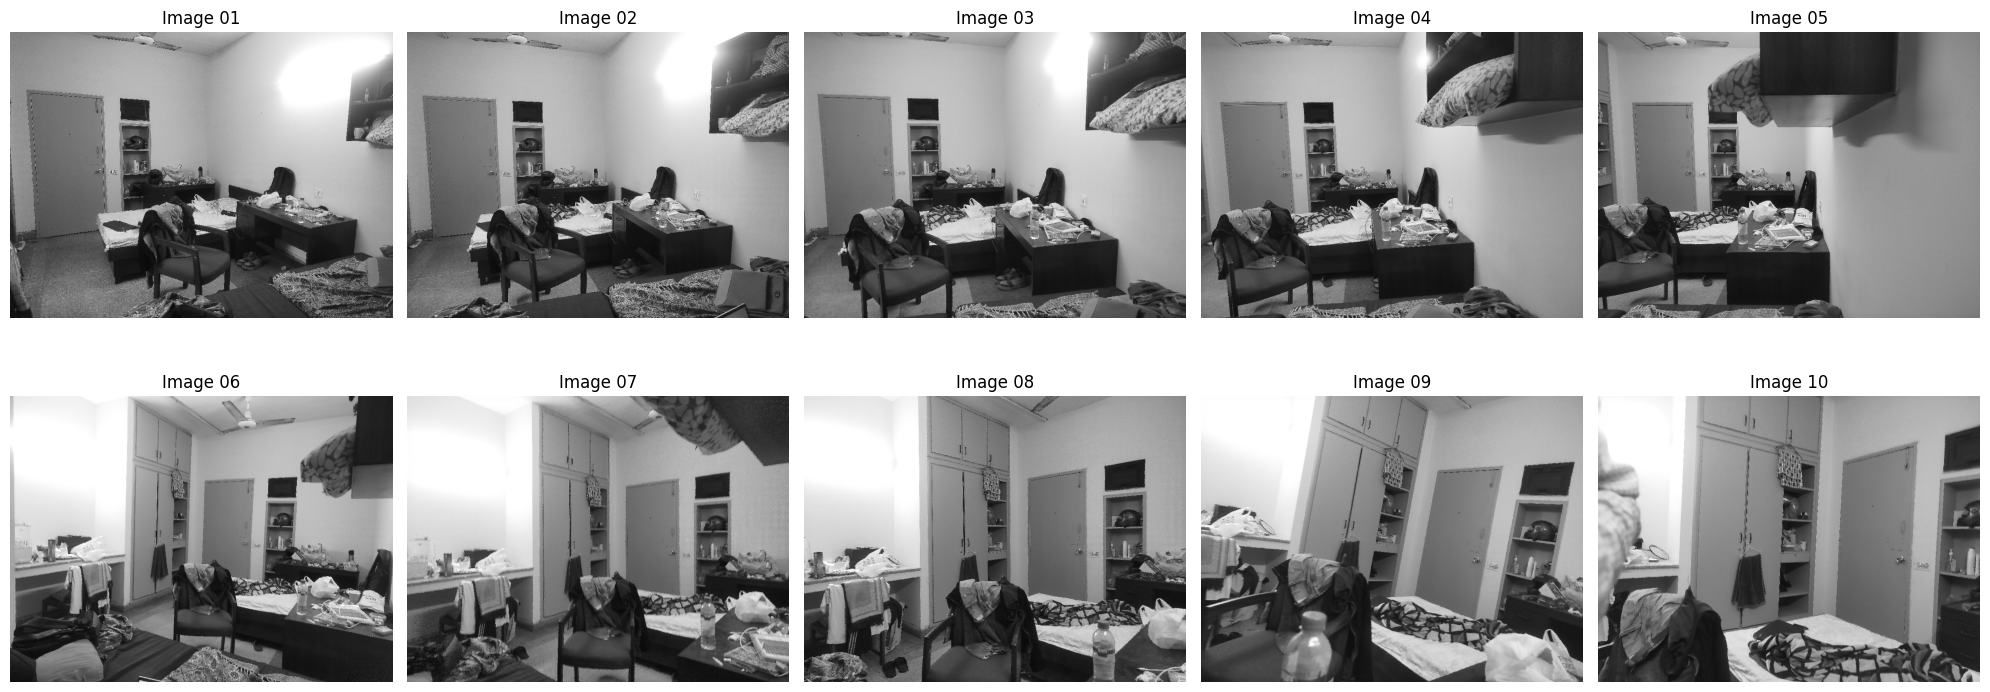

In [4]:
print(f"Displaying 10 sample images from the {len(images)}-image dataset:")

num_rows, num_cols = 2, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))
axes = axes.flatten()

for i in range(10):
    if i < len(images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Image {i+1:02d}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## 2. Feature Matching & Preprocessing
We implemented feature detection using **SIFT (Scale-Invariant Feature Transform)**. 

**Preprocessing Strategy:**
To ensure high-quality reconstruction, we applied **Lowe's Ratio Test** as a preprocessing filter. 
* For each feature in Image A, we find the two best matches in Image B.
* We only keep the match if the distance to the first neighbor is significantly smaller (ratio < 0.7) than the distance to the second neighbor.
* This effectively removes ambiguous matches and noise.

Running SIFT feature matching on consecutive image pairs...
Filter: Lowe's Ratio Test (threshold=0.7)

--- Pair 1: Image 01 vs Image 02 ---
Good matches found: 67


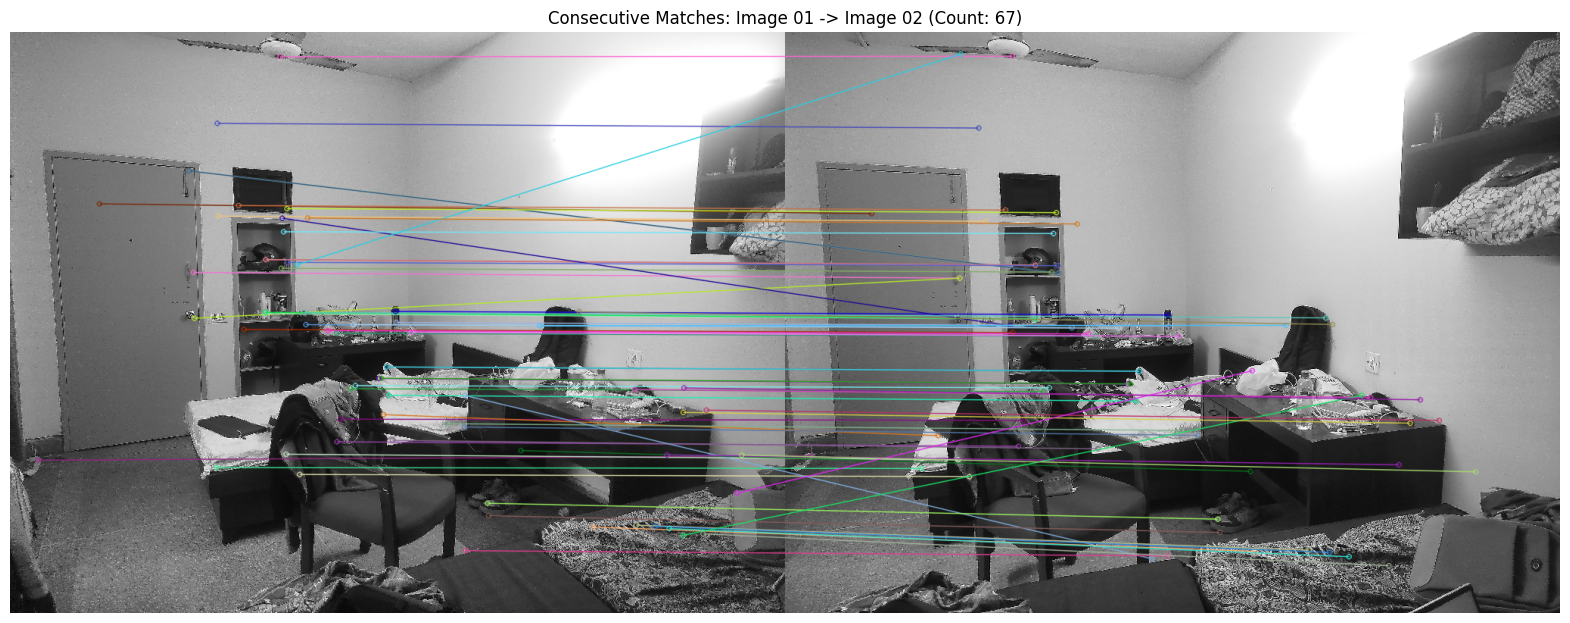


--- Pair 2: Image 02 vs Image 03 ---
Good matches found: 142


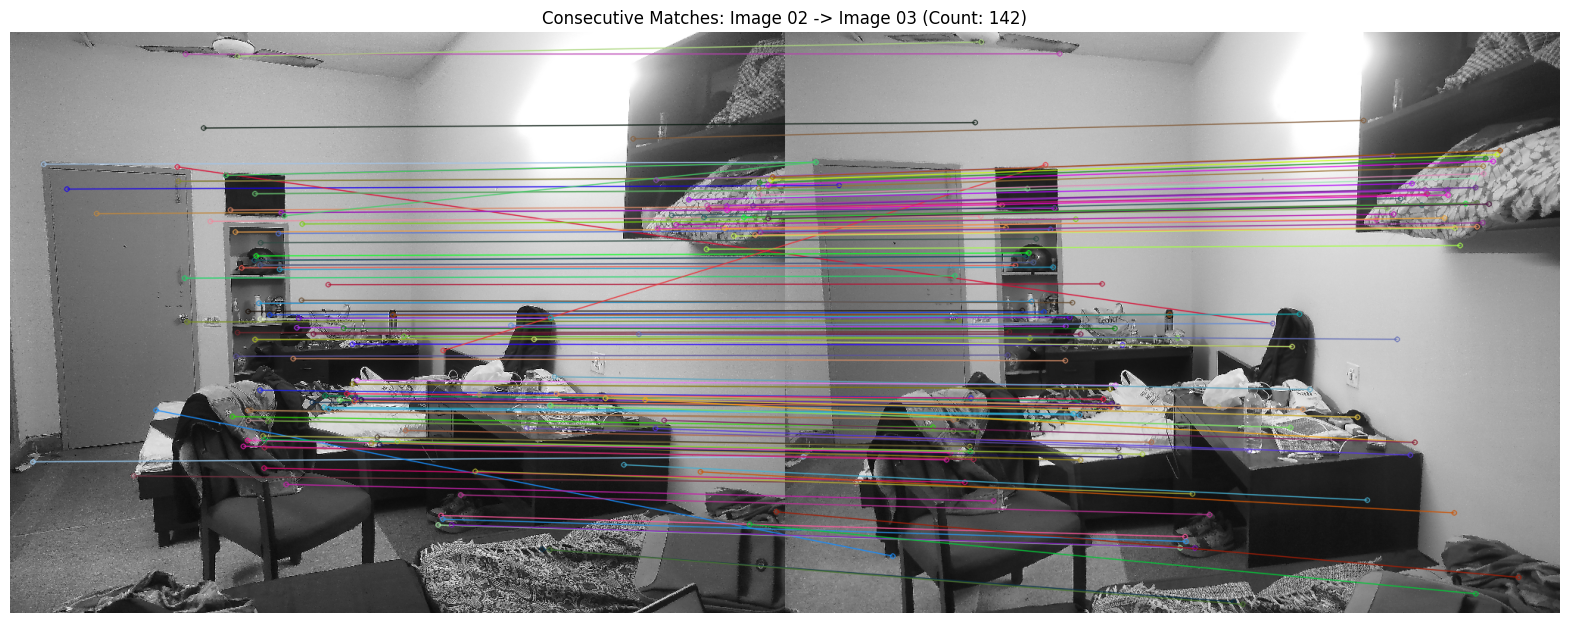


--- Pair 3: Image 03 vs Image 04 ---
Good matches found: 92


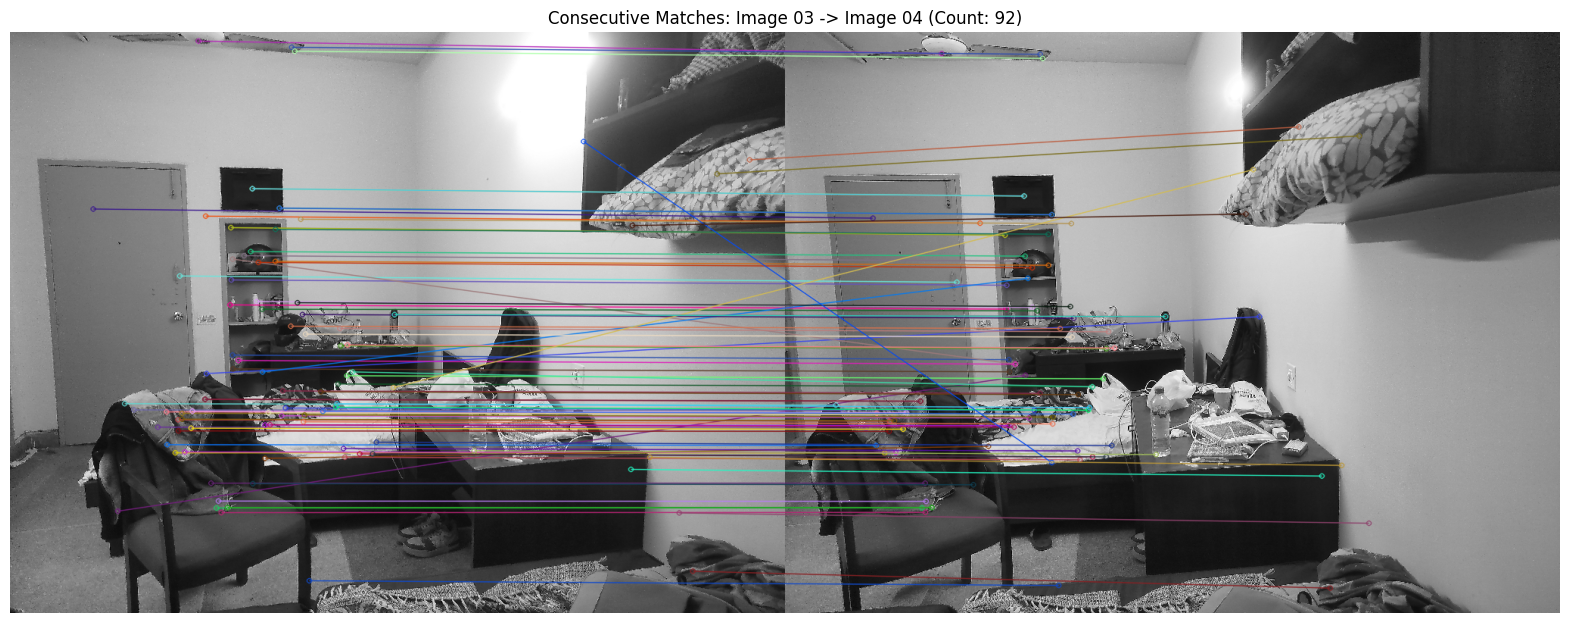


--- Pair 4: Image 04 vs Image 05 ---
Good matches found: 99


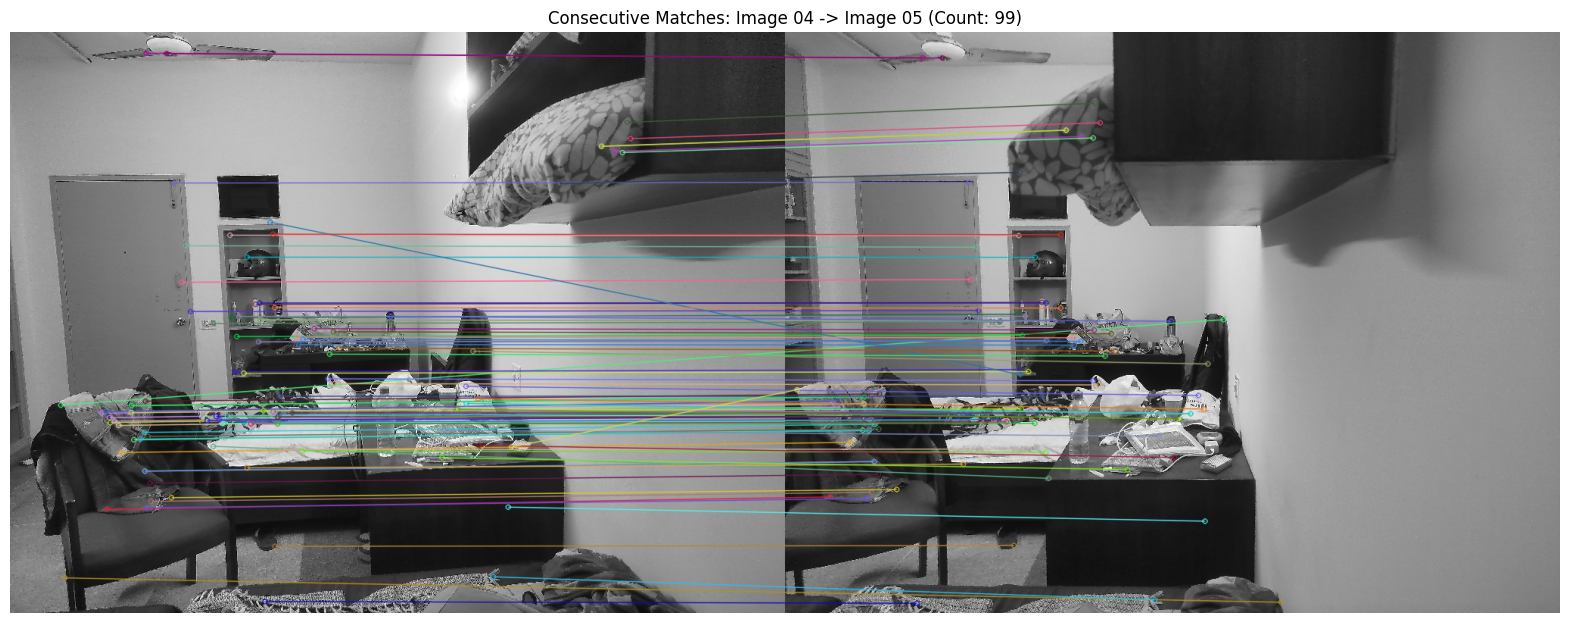


--- Pair 5: Image 05 vs Image 06 ---
Good matches found: 173


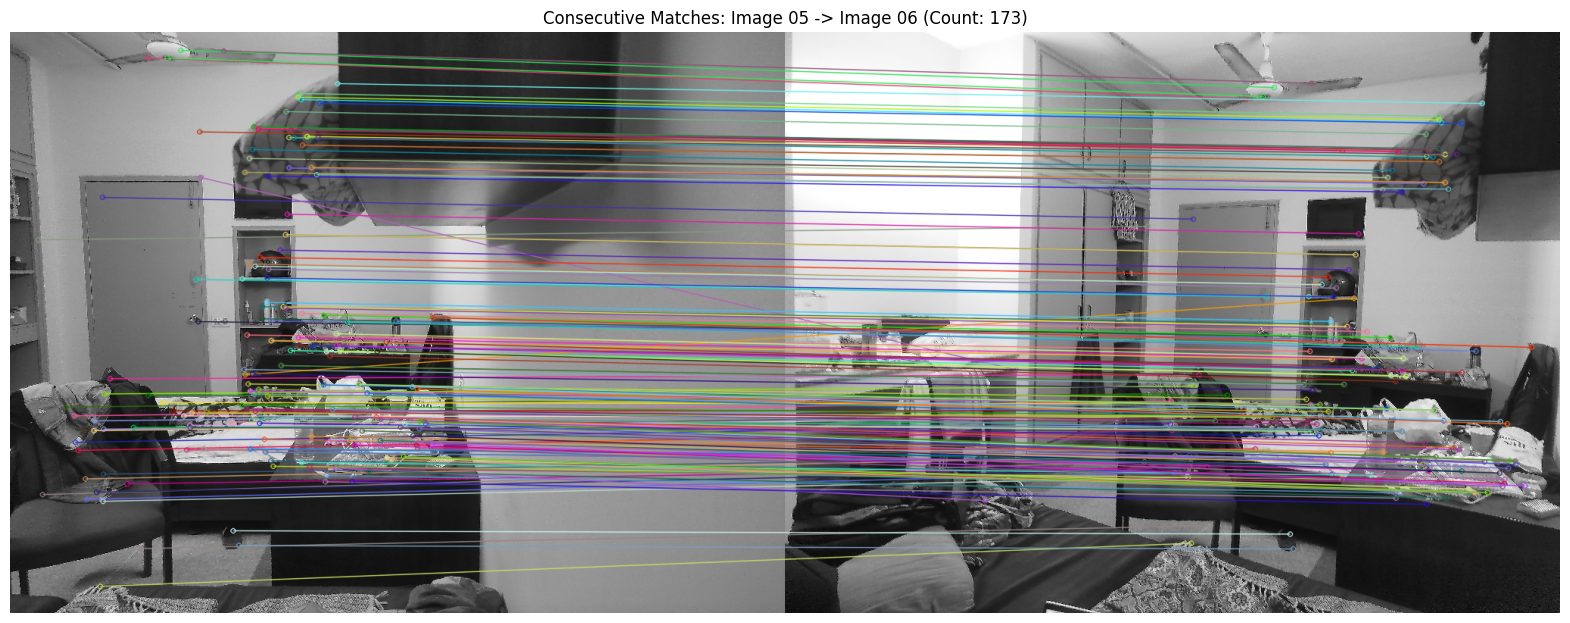

In [5]:
print("Running SIFT feature matching on consecutive image pairs...")
print("Filter: Lowe's Ratio Test (threshold=0.7)")

NUM_PAIRS = 5

for i in range(NUM_PAIRS):
    if i + 1 >= len(images):
        break
        
    img1 = images[i]
    img2 = images[i+1]
    
    kp1, kp2, good_matches = get_sift_matches(img1, img2)
    
    print(f"\n--- Pair {i+1}: Image {i+1:02d} vs Image {i+2:02d} ---")
    print(f"Good matches found: {len(good_matches)}")
    
    match_img = draw_matches(img1, kp1, img2, kp2, good_matches)
    match_img_rgb = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(20, 8))
    plt.imshow(match_img_rgb)
    plt.title(f"Consecutive Matches: Image {i+1:02d} -> Image {i+2:02d} (Count: {len(good_matches)})")
    plt.axis('off')
    plt.show()